In [2]:
import src.db.dataService as db
import src.db.preprocess as preprocess
import pandas as pd

from src.get_location_features import get_location_features_by_squares, get_location_features_by_radius, get_elevation_data

connection = db.create_connection()
sensors_data = pd.read_csv(
    "data/air-quality-data-from-extensive-network-of-sensors/sensor_locations.csv").set_index(
    'id')
features_by_squares = [
    ('grid250_dochod', 'dochod_bud_pra'),
    ('grid250_demo_ext', 'populacja_razem'),
    ('grid250_demo_ext', 'budynki_all'),
    ('grid250_demo_ext', 'budynki_mieszkalne'),
]
squares = [9, 16, 25]

features_by_radius = {
    'Przystanek autobusowy': [1000, 2000],
    'Oddział Banku': [1000, 2000],
    'Przystanek tramwajowy': [1000, 2000],
    'Hipermarket': [1000, 2000],
    'Stacja Paliw': [1000, 3000]
}

OperationalError: FATAL:  pg_hba.conf rejects connection for host "193.238.191.251", user "sample_user", database "locit_sample", SSL on
FATAL:  pg_hba.conf rejects connection for host "193.238.191.251", user "sample_user", database "locit_sample", SSL off


In [2]:
sensors_data = get_location_features_by_squares(sensors_data, connection, features_by_squares, squares)
sensors_data = get_location_features_by_radius(sensors_data, connection, features_by_radius)
sensors_data = get_elevation_data(sensors_data)

In [33]:
print(sensors_data.head())

      latitude  longitude  dochod_bud_pra_9  dochod_bud_pra_16  \
id                                                               
3    50.057748  19.961375             47264              78228   
140  50.057747  19.961374             47264              78228   
142  50.084816  19.878066             47303              74255   
147  50.048924  19.962262             41575              77522   
169  50.048699  20.101569             23303              40365   

     dochod_bud_pra_25  populacja_razem_9  populacja_razem_16  \
id                                                              
3               113184               3743                6098   
140             113184               3743                6098   
142             121276               1303                1959   
147             116384                991                2965   
169              40365                 26                  59   

     populacja_razem_25  budynki_all_9  budynki_all_16    ...      \
id          

In [56]:
def get_target_variables():
    december_df = pd.read_csv("data/air-quality-data-from-extensive-network-of-sensors/december-2017.csv")
    ms = december_df.mean()
    means = pd.DataFrame({ms.index[i*6].split('_')[0]: list(ms[i*6:i*6+6]) for i in range(int(ms.shape[0]/6))}).T
    means.columns = ['temperature', 'humidity', 'pressure', 'pm1', 'pm10', 'pm25']
    means.index = means.index.astype('int64')
    return means[['pm1', 'pm10', 'pm25']]

In [57]:
y = get_target_variables()
y.head()

,pm1,pm10,pm25
140,36.632582,39.072790,67.102253
142,NaN,NaN,NaN
147,NaN,NaN,NaN
169,24.949239,25.332487,40.593909
170,31.023173,34.793226,53.909091


In [62]:
data = pd.concat([y, sensors_data], axis=1, join='inner')
data = data.dropna()

In [64]:
data.shape

(47, 28)

In [67]:
data.to_csv('./processed_data.csv')

In [11]:
import pandas as pd
data = pd.read_csv('./processed_data.csv', index_col=0)

In [29]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

discrete = ['Przystanek autobusowy_1000', 'Przystanek autobusowy_2000',
       'Oddział Banku_1000', 'Oddział Banku_2000',
       'Przystanek tramwajowy_1000', 'Przystanek tramwajowy_2000',
       'Hipermarket_1000', 'Hipermarket_2000', 'Stacja Paliw_1000',
       'Stacja Paliw_3000']
continuous = ['pm1', 'pm10', 'pm25', 'dochod_bud_pra_9',
       'dochod_bud_pra_16', 'dochod_bud_pra_25', 'populacja_razem_9',
       'populacja_razem_16', 'populacja_razem_25', 'budynki_all_9',
       'budynki_all_16', 'budynki_all_25', 'budynki_mieszkalne_9',
       'budynki_mieszkalne_16', 'budynki_mieszkalne_25', 'elevation']

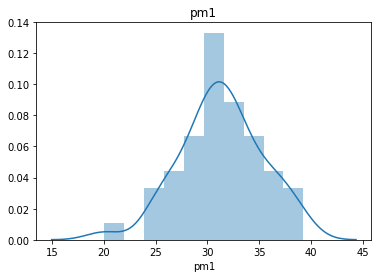

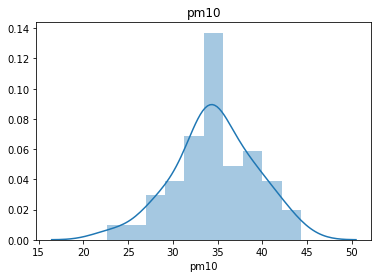

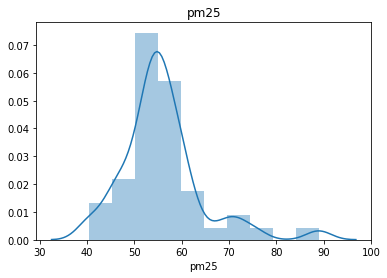

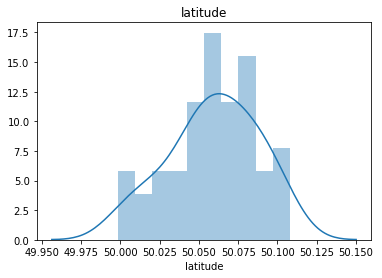

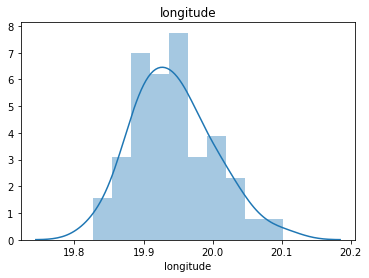

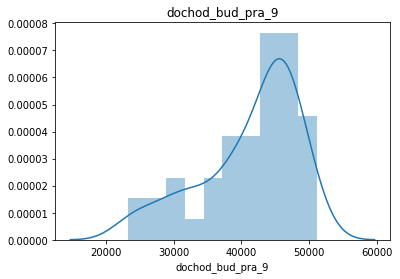

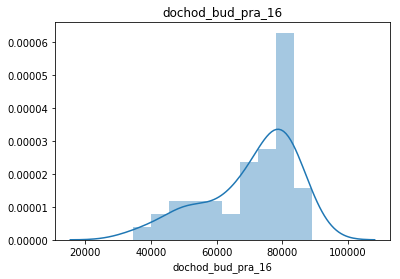

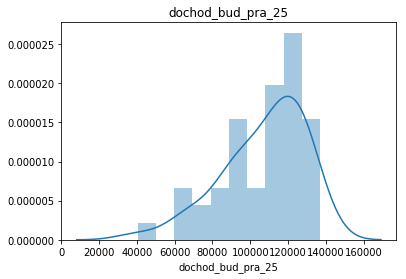

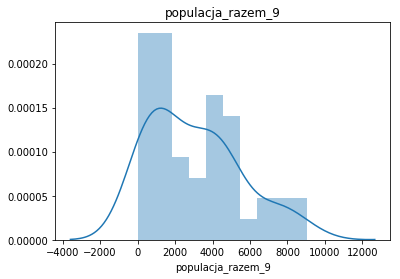

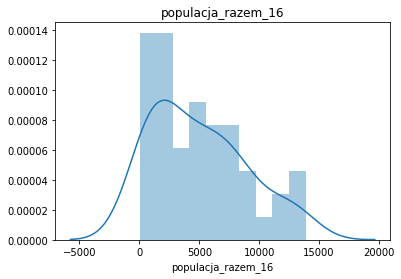

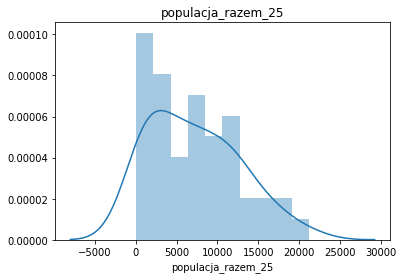

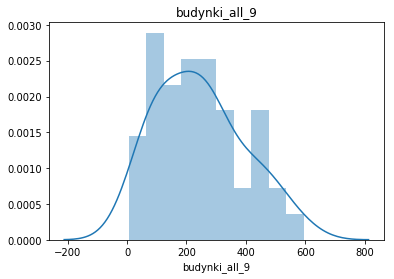

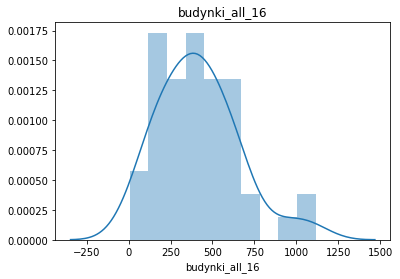

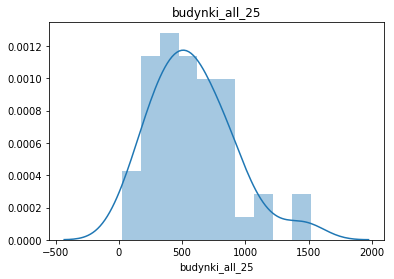

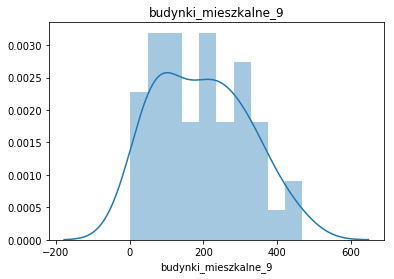

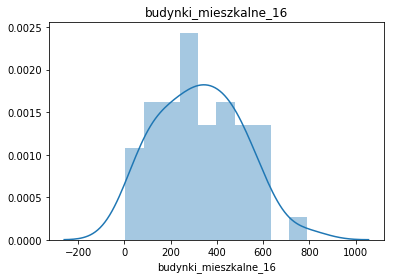

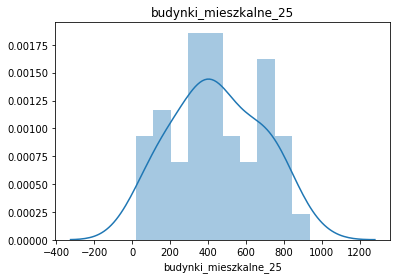

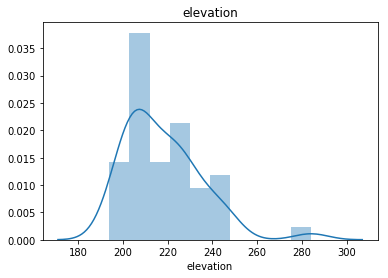

In [21]:
for attr in continuous:
    sns.distplot(data[attr], bins=10).set_title(attr)
    plt.figure()